In [8]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
#from google.colab import drive
#drive.mount('/content/drive')

data = pd.read_csv('Measurement_summary.csv')

In [9]:

data.head(10)


,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [10]:
df=data['PM2.5']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(647511, 1)


In [11]:
list_=[]
for i in range (0,df.shape[0]):
  list_.append(df[i][0])
print(len(list_))

647511


In [12]:
window_size=5
y=[]
for i in range (0,len(list_)-5):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


647506 [57.0, 59.0, 59.0, 58.0, 61.0]


In [13]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['X1','X2','X3','X4','Y'])
new_data.head(10)


(647506, 5)


,X1,X2,X3,X4,Y
0,57.0,59.0,59.0,58.0,61.0
1,59.0,59.0,58.0,61.0,61.0
2,59.0,58.0,61.0,61.0,57.0
3,58.0,61.0,61.0,57.0,60.0
4,61.0,61.0,57.0,60.0,60.0
5,61.0,57.0,60.0,60.0,63.0
6,57.0,60.0,60.0,63.0,68.0
7,60.0,60.0,63.0,68.0,74.0
8,60.0,63.0,68.0,74.0,79.0
9,63.0,68.0,74.0,79.0,79.0


In [14]:
# NORMALISE the DATASET
#from sklearn import preprocessing
#scaler = preprocessing.MinMaxScaler()
#matrix= scaler.fit_transform(matrix)
#mm_scaler.transform(X_test)
#new_data = pd.DataFrame(matrix,columns=['X1','X2','X3','X4','Y'])
#new_data.head(10)

In [15]:
print(matrix[:,4])

[[61.]
 [61.]
 [57.]
 ...
 [19.]
 [17.]
 [18.]]


In [16]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
print(prediction.shape,prediction[0:5])

(213677, 1) [[17.63404041]
 [27.14562998]
 [29.49827441]
 [12.61887563]
 [19.22818984]]


In [17]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.1988501709011321
[9.65154303]
[[0.12071222 0.12440673 0.15526335 0.22031139]]


In [18]:
print(mean_squared_error(y_test,prediction)**0.5)
print(r2_score(y_test,prediction))

40.68149962262998
0.17268271971840865


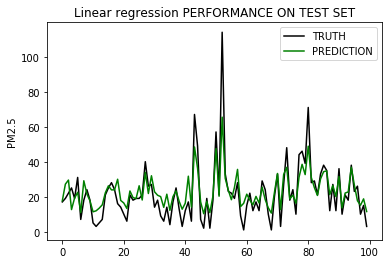

In [19]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [20]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
model = linear_model.BayesianRidge()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(mean_squared_error(y_test,prediction)**0.5)
print(r2_score(y_test,prediction))

C:\Users\richa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


40.68148832549145
0.1726831792057293


In [21]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=2, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(mean_squared_error(y_test,prediction)**0.5)
print(r2_score(y_test,prediction))

C:\Users\richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


39.99045033070563
0.20055097428471547


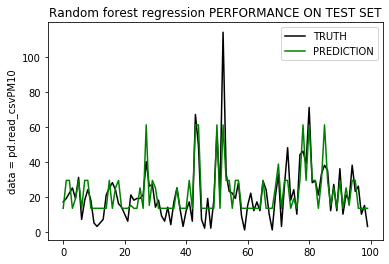

In [22]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('data = pd.read_csvPM2.5')
plt.legend()
plt.show()

In [23]:
# IMPLEMENTING LASSO REGRESSION
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(mean_squared_error(y_test,prediction)**0.5)
print(r2_score(y_test,prediction))

40.68145652852579
0.17268447247966467


In [24]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(mean_squared_error(y_test,prediction)**0.5)
print(r2_score(y_test,prediction))


40.68149962243874
0.17268271972618698


In [25]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(mean_squared_error(y_test,prediction)**0.5)
print(r2_score(y_test,prediction))

C:\Users\richa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


44.09657840837969
0.02795141338279561


C:\Users\richa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


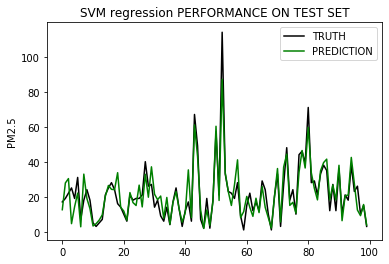

In [26]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [27]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=50, batch_size=64)

Using TensorFlow backend.


Epoch 1/50
433829/433829 [==============================] - 17s 40us/step - loss: 1399.3788 - accuracy: 0.0771
Epoch 2/50
433829/433829 [==============================] - 17s 39us/step - loss: 1373.3672 - accuracy: 0.0715
Epoch 3/50
433829/433829 [==============================] - 17s 39us/step - loss: 1373.3373 - accuracy: 0.0758
Epoch 4/50
433829/433829 [==============================] - 18s 40us/step - loss: 1381.6620 - accuracy: 0.0777
Epoch 5/50
433829/433829 [==============================] - 18s 40us/step - loss: 1393.1321 - accuracy: 0.0765
Epoch 6/50
433829/433829 [==============================] - 17s 39us/step - loss: 1368.9983 - accuracy: 0.0788
Epoch 7/50
433829/433829 [==============================] - 15s 35us/step - loss: 1371.0682 - accuracy: 0.0770
Epoch 8/50
433829/433829 [==============================] - 15s 34us/step - loss: 1366.9293 - accuracy: 0.0773
Epoch 9/50
433829/433829 [==============================] - 14s 33us/step - loss: 1368.3393 - accuracy: 0.0764
E

dict_keys(['loss', 'accuracy'])


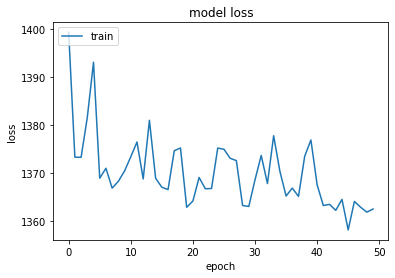

38.78943071216381


In [28]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print(mean_squared_error(y_test,y_pred)**0.5)
#Converting predictions to label


In [29]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[16. 18. 15. 19.]
 [26. 25. 28. 27.]
 [39. 37. 31. 29.]
 ...
 [20. 20. 21. 18.]
 [12. 13. 11. 14.]
 [17. 18. 18. 13.]]
(433829, 4)
(433829, 4, 1)


In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
433829/433829 [==============================] - 239s 550us/step - loss: 1586.0674
Epoch 2/30
433829/433829 [==============================] - 233s 537us/step - loss: 1525.2239
Epoch 3/30
433829/433829 [==============================] - 235s 541us/step - loss: 1504.4423
Epoch 4/30
433829/433829 [==============================] - 231s 532us/step - loss: 1491.2043
Epoch 5/30
433829/433829 [==============================] - 231s 533us/step - loss: 1475.9105
Epoch 6/30
433829/433829 [==============================] - 229s 528us/step - loss: 1461.2862
Epoch 7/30
433829/433829 [==============================] - 218s 503us/step - loss: 1445.4642
Epoch 8/30
433829/433829 [==============================] - 220s 507us/step - loss: 1437.3871
Epoch 9/30
433829/433829 [==============================] - 218s 502us/step - loss: 1422.7103
Epoch 10/30
433829/433829 [==============================] - 211s 487us/step - loss: 1408.9082
Epoch 11/30
433829/433829 [==============================] 

dict_keys(['loss'])


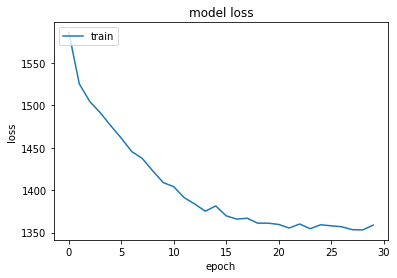

38.587866283717986


In [31]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
y_pred = regressor.predict(X_test)
print(mean_squared_error(y_test,y_pred)**0.5)

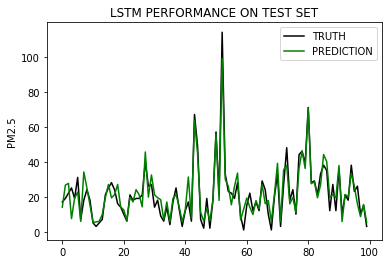

In [32]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(y_pred[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()